In [44]:
import numpy as np
import sympy as sp
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('../mnist/mnist_train.csv')

label : 1
 

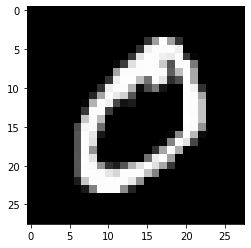

In [125]:
Y = data[:,0]
y = np.array([Y == 0], dtype=int).reshape(59999)
X = data[:, 1:]
N, M = X.shape

C = 200
alpha = np.ones(N)
b = 0.0

def show_digit(X, y, index):
    print('label : {}'.format(y[index]), end='\n ')
    plt.imshow(X[index].reshape(28, 28), cmap='gray')
show_digit(X, y, 0)

In [115]:
def kernal(i, j):
    l2 = np.linalg.norm(X[i] - X[j], ord=2)
    return np.exp(l2 / 200)
kernal(0, 1)

1972208.4937592982

In [130]:
# 预测函数
def g(i):
    _sum = 0
    for j in range(N):
        _sum += alpha[j] * y[j] * kernal(i, j)
    _sum += b
    return _sum
g(0)

1589296395.489776

In [131]:
# 误差函数
def error(i):
    return g(i) - y[i]
error(0)

1589296394.489776

In [133]:
# kkt条件
def kkt(i):
    if alpha[i] == 0:
        return y[i] * g(i) >= 1
    if alpha[i] == C:
        return y[i] * g(i) <= 1
    if 0 < alpha[i] < C:
        return y[i] * g(i) == 1
    return False

# 衡量违背kkt条件的程度
def get_kkt_difference(i):
    if kkt(i):
        return 0
    
    if alpha[i] == 0:
        return 1 - y[i] * g(i)
    if alpha[i] == C:
        return y[i] * g(i) - 1
    if 0 < alpha[i] < C:
        return np.abs(1 - y[i] * g(i))
    return 100

kkt(0), get_kkt_difference(0)

(False, 1589296394.489776)

In [ ]:
def pick_idx():
    # 首先找到一个违反kkt条件最严重的
    max_kkt_difference = 0
    _i = -1
    for i in range(N):
        # 不违背kkt条件直接跳过
        if kkt(i):
            continue
        kkt_difference = get_kkt_difference(i)
        # 找到的kkt条件比最大的kkt条件违背的程度小也直接跳过
        if kkt_difference <= max_kkt_difference:
            continue
        # 替换掉最大的kkt条件
        max_kkt_difference = kkt_difference
        # 保存相应的索引
        _i = i

    # 第二个数据点我们要找到一个使|E_0 - E_1|最大的
    max_E_difference = 0
    _j = -1
    for i in range(N):
        E_difference = np.abs(error(_j) - error(j))
        if max_E_difference >= E_difference:
            continue

        max_E_difference = E_difference
        _j = i
    return _i, _j
pick_idx()